# Video Game Sales Prediction

## Background
The video game industry is a rapidly expanding sector that now surpasses the combined revenues of the film and music industries. In this project, I will delve into a video game dataset to devise a novel game sales forecasting model.

## Objective
This project aims to construct a predictive model to estimate global video game sales. This model leverages various game characteristics, including platform, genre, year of release, and publisher.

## Dataset
I used the ["Video Game Sales" dataset from Kaggle](https://www.kaggle.com/datasets/gregorut/videogamesales). 
The dataset consists of 16,598 rows and 11 columns. The features include categorical data (e.g., Platform, Genre, Publisher) and numerical data (e.g., Year, Sales in various regions). A preliminary analysis showed that the data contains some missing values, particularly in the 'Year' and 'Publisher' columns, which will be addressed during the data cleaning process.

The dataset includes the following columns:

- **Name**: The name of the video game.
- **Platform**: The platform on which the game was released (e.g., PS4, Xbox One, PC).
- **Year**: The release year of the game.
- **Genre**: The genre of the game (e.g., Action, RPG, Sports).
- **Publisher**: The publisher of the game.
- **NA_Sales**: Sales in North America (in millions of dollars).
- **EU_Sales**: Sales in Europe (in millions of dollars).
- **JP_Sales**: Sales in Japan (in millions of dollars).
- **Other_Sales**: Sales in other regions (in millions of dollars).
- **Global_Sales**: Total global sales (in millions of dollars).

## Methodology
I followed these steps to complete the project:
1. **Data Preprocessing**: Cleaned and preprocessed the data to prepare it for analysis.
2. **Exploratory Data Analysis (EDA)**: Performed EDA to understand the data and identify important features.
3. **Model Building and Training**: Built and trained a predictive model using machine learning techniques.
4. **Evaluation and Discussion**: Evaluated the model's performance and discussed the results.
5. **Conclusion**: Summarized the findings and suggested possible future work.

## Data Loading and Preprocessing

In this section, I will load the dataset and perform basic data preprocessing tasks such as handling missing values and encoding categorical features.

### Data Loading
First, I will load the dataset using pandas and display the first few rows to understand its structure.

In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./data/vgsales.csv')
#data = pd.read_csv('./data/vgchartz-2024.csv')


# Display the first few rows of the dataset
data.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
# Handle missing values by dropping rows with missing data
data.dropna(inplace=True)

# Convert the 'Year' column to categorical type
data['Year'] = data['Year'].astype('category')

# Split the data into features and target variable
X = data[['Platform', 'Genre', 'Year', 'Publisher']]
y = data['Global_Sales']

# Encode categorical features using one-hot encoding
X = pd.get_dummies(X)

# Display the first few rows of the processed dataset
X.head()

,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# Display basic statistics of the dataset
print(data.describe())

               Rank      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count  16291.000000  16291.000000  16291.000000  16291.000000  16291.000000   
mean    8290.190228      0.265647      0.147731      0.078833      0.048426   
std     4792.654450      0.822432      0.509303      0.311879      0.190083   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%     4132.500000      0.000000      0.000000      0.000000      0.000000   
50%     8292.000000      0.080000      0.020000      0.000000      0.010000   
75%    12439.500000      0.240000      0.110000      0.040000      0.040000   
max    16600.000000     41.490000     29.020000     10.220000     10.570000   

       Global_Sales  
count  16291.000000  
mean       0.540910  
std        1.567345  
min        0.010000  
25%        0.060000  
50%        0.170000  
75%        0.480000  
max       82.740000  


## Exploratory Data Analysis (EDA)

In this section, I will perform exploratory data analysis to understand the distribution and relationships within the dataset.

### Distribution of Global Sales
First, I will visualize the distribution of global sales.

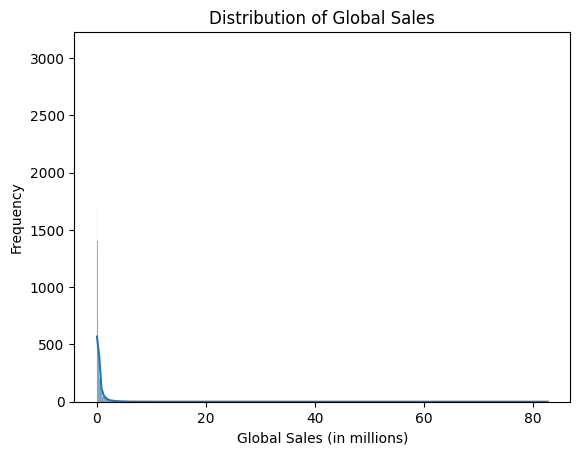

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram of global sales
sns.histplot(data['Global_Sales'], kde=True)
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Frequency')
plt.show()

### Total Sales by Platform
Next, I will visualize the total sales by platform to see which platforms are the most successful.

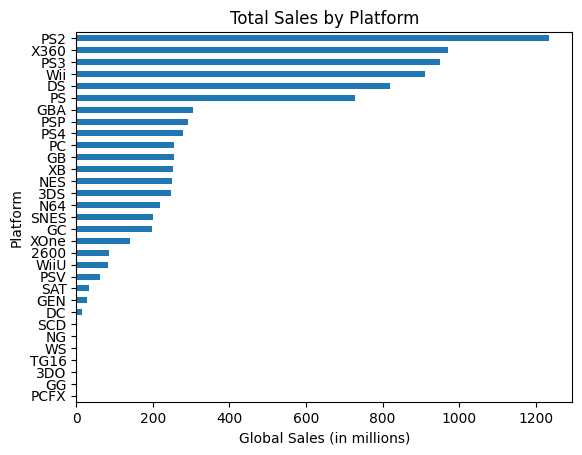

In [9]:
# Plot bar chart of total sales by platform
platform_sales = data.groupby('Platform')['Global_Sales'].sum().sort_values()
platform_sales.plot(kind='barh')
plt.title('Total Sales by Platform')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Platform')
plt.show()

### Correlation Matrix
Finally, I will create a correlation matrix to examine the relationships between different sales regions.

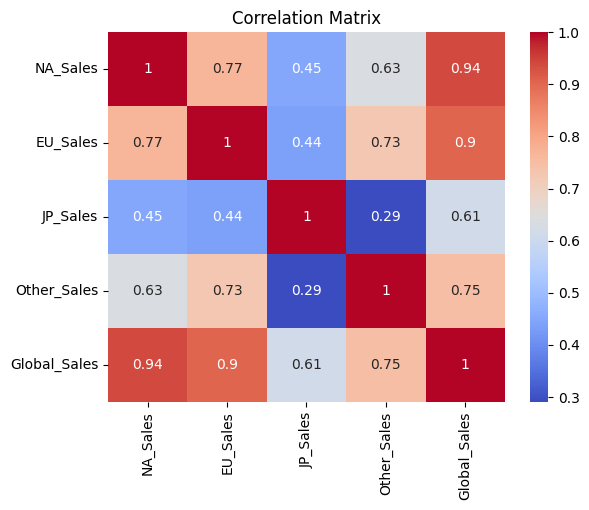

In [10]:
# Plot correlation matrix
corr_matrix = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Model Building and Training

In this section, I will build and train a predictive model using the Random Forest Regressor algorithm. The data will be split into training and testing sets, and the model's performance will be evaluated.

### Data Splitting
First, I will split the data into training and testing sets.

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training
Next, I will train a Random Forest Regressor model on the training data.

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Model Evaluation
Finally, I will evaluate the model's performance on the testing data using Mean Squared Error (MSE) as the evaluation metric.

In [14]:
from sklearn.metrics import mean_squared_error

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4.224560613688438


## Results and Discussion

In this section, I will visualize the model's predictions compared to the actual sales and discuss the results.

### Predicted vs Actual Sales
First, I will create a scatter plot to compare the predicted sales with the actual sales.


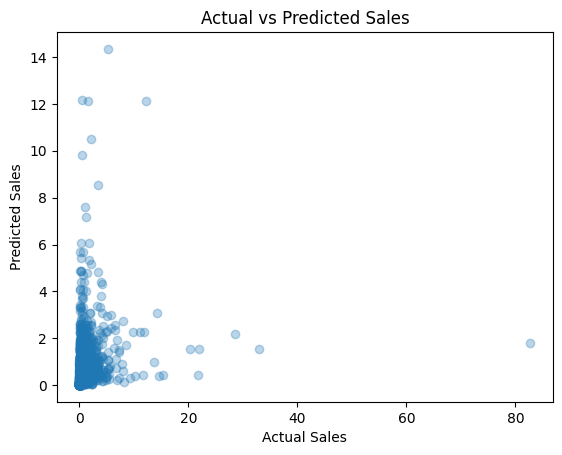

In [15]:
import matplotlib.pyplot as plt

# Plot actual vs predicted sales
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

### Residual Plot
Next, I will create a residual plot to visualize the differences between the actual and predicted sales.


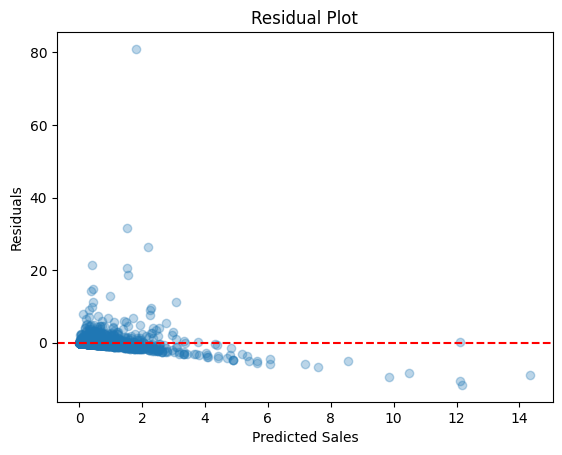

In [16]:
import numpy as np

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### Feature Importance
Finally, I will visualize the top 5 feature importances to understand which features contribute the most to the model's predictions.

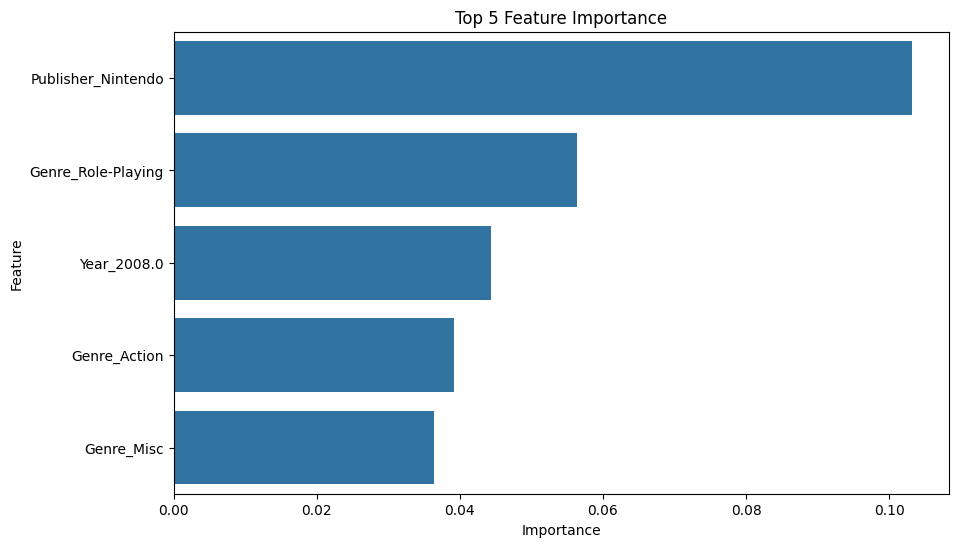

In [18]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance and select top 5
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).head(5)

# Plot top 5 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Top 5 Feature Importance')
plt.show()

### Feature Importance
The feature importance plot shows that the `Publisher_Nintendo` is the most influential feature in predicting global video game sales. This suggests that games published by Nintendo tend to have higher sales. The next important features are `Genre_Role-Playing`, `Year_2008.0`, `Genre_Action`, and `Genre_Misc`, indicating that the genre and release year also play significant roles in determining the sales.

### Discussion
The Mean Squared Error (MSE) of the model is 4.224, which indicates the average squared difference between the predicted and actual sales values. A lower MSE indicates better predictive accuracy. However, there might be room for improvement. 

Some potential steps to improve the model could include:
1. Trying different machine learning algorithms such as gradient boosting, support vector machines, or neural networks.
2. Performing hyperparameter tuning using techniques like grid search or random search.
3. Exploring additional feature engineering techniques to capture more relevant information from the data.

The feature importance analysis reveals that the publisher and genre of the game are critical factors in predicting sales. This insight can be useful for game developers and publishers when planning new game releases.

## Conclusion
In this project, I built a predictive model to estimate global video game sales based on various features such as platform, genre, release year, and publisher. The Random Forest Regressor model achieved a Mean Squared Error of 4.224. While the model provides a good starting point, there is room for improvement through the use of other algorithms, hyperparameter tuning, and further feature engineering.

Overall, this project demonstrates the potential of machine learning in predicting video game sales and provides a foundation for further exploration and refinement.